Proyecto Grupal 2

# Fase 1: Selección de Datos

In [1]:
import pandas as pd

# Cargar el archivo desde Google Colab
ruta_archivo = '/content/Consolidado_Proyecto_.xlsx'

# Leer las dos hojas del archivo Excel en DataFrames separados
df_2022 = pd.read_excel(ruta_archivo, sheet_name='2022')
df_2022["ANIO"] = 2022  # Nueva columna indicando el año

df_2023 = pd.read_excel(ruta_archivo, sheet_name='2023')
df_2023["ANIO"] = 2023  # Nueva columna indicando el año

# Validar si las columnas son las mismas
if not df_2022.columns.equals(df_2023.columns):
    print("Advertencia: Las columnas no coinciden entre las hojas de 2022 y 2023")

# Unir los datos en un solo DataFrame
df_consolidado = pd.concat([df_2022, df_2023], ignore_index=True)

# Guardar el DataFrame consolidado en un archivo CSV para futuras fases
df_consolidado.to_csv('/content/Consolidado_Proyecto_Unido.csv', index=False)

# Verificar la estructura del DataFrame consolidado
print("Dimensiones del DataFrame consolidado:", df_consolidado.shape)
print("Primeras filas:")
print(df_consolidado.head())

Advertencia: Las columnas no coinciden entre las hojas de 2022 y 2023
Dimensiones del DataFrame consolidado: (437023, 37)
Primeras filas:
       ENT_NOM ENT_SIM_TIP_EST  \
0     ALTAMIRA            CS-B   
1        MANTA            CS-C   
2  LOS ESTEROS            CS-A   
3  15 DE ABRIL            CS-A   
4     ALTAMIRA            CS-B   

                                     ENT_DES_TIP_EST ENT_DES_PROV  \
0                             CENTRO DE SALUD TIPO B       MANABI   
1  CENTRO DE SALUD TIPO C-MATERNO INFANTIL Y EMER...       MANABI   
2                             CENTRO DE SALUD TIPO A       MANABI   
3                             CENTRO DE SALUD TIPO A       MANABI   
4                             CENTRO DE SALUD TIPO B       MANABI   

  ENT_DES_CANT    ENT_DES_PARR ENT_DES_TIP_PARR PCTE_SEXO  \
0        MANTA     LOS ESTEROS           Urbano     Mujer   
1        MANTA  MANTA (URBANO)           Urbano    Hombre   
2        MANTA     LOS ESTEROS           Urbano     Mujer  

In [2]:
df_consolidado.columns.tolist()

['ENT_NOM',
 'ENT_SIM_TIP_EST',
 'ENT_DES_TIP_EST',
 'ENT_DES_PROV',
 'ENT_DES_CANT',
 'ENT_DES_PARR',
 'ENT_DES_TIP_PARR',
 'PCTE_SEXO',
 'PCTE_FEC_NAC',
 'PCTE_ANIOS',
 'PCTE_NACIONALIDAD',
 'PCTE_AUTID_ETN',
 'PCTE_SEG',
 'PCTE_GRP_PRI',
 'PCTE_DES_PROV',
 'PCTE_DES_CANT',
 'PCTE_DES_PARR',
 'PCTE_DIR_BARR',
 'PCTE_PESO',
 'PCTE_TALLA',
 'PCTE_CAT_TALLA_EDAD_Z',
 'PCTE_CAT_PESO_EDAD_Z',
 'PCTE_CAT_IMC_EDAD_Z',
 'ATEMED_FEC_INI',
 'CIE_10',
 'ATEMED_DES_CIE10',
 'ATEMED_TIP_DIAG',
 'ATEMED_CRON_DIAG',
 'ATEMED_CON_DIAG',
 'PCTE_TIP_DISC',
 'ATEMED_TIP_ATE',
 'ATEMED_LUG_ATE',
 'PCTE_ULT_IMC_CATEGORIA',
 'Unnamed: 33',
 'Unnamed: 34',
 'Unnamed: 35',
 'ANIO']

In [3]:
# Lista de columnas que deseas eliminar
columnas_a_eliminar = ["Unnamed: 33", "Unnamed: 34", "Unnamed: 35"]

# Verificamos que existan en el DataFrame antes de intentar eliminarlas
columnas_existentes = [col for col in columnas_a_eliminar if col in df_consolidado.columns]

# Eliminamos las columnas existentes
df_consolidado = df_consolidado.drop(columns=columnas_existentes)

# Guardamos el nuevo DataFrame limpio en un archivo CSV
df_consolidado.to_csv('/content/Consolidado_Proyecto_Unido_Limpio.csv', index=False)

# Confirmamos
print("Nuevo archivo generado sin las columnas especificadas.")
print("Columnas actuales:", df_consolidado.columns.tolist())

Nuevo archivo generado sin las columnas especificadas.
Columnas actuales: ['ENT_NOM', 'ENT_SIM_TIP_EST', 'ENT_DES_TIP_EST', 'ENT_DES_PROV', 'ENT_DES_CANT', 'ENT_DES_PARR', 'ENT_DES_TIP_PARR', 'PCTE_SEXO', 'PCTE_FEC_NAC', 'PCTE_ANIOS', 'PCTE_NACIONALIDAD', 'PCTE_AUTID_ETN', 'PCTE_SEG', 'PCTE_GRP_PRI', 'PCTE_DES_PROV', 'PCTE_DES_CANT', 'PCTE_DES_PARR', 'PCTE_DIR_BARR', 'PCTE_PESO', 'PCTE_TALLA', 'PCTE_CAT_TALLA_EDAD_Z', 'PCTE_CAT_PESO_EDAD_Z', 'PCTE_CAT_IMC_EDAD_Z', 'ATEMED_FEC_INI', 'CIE_10', 'ATEMED_DES_CIE10', 'ATEMED_TIP_DIAG', 'ATEMED_CRON_DIAG', 'ATEMED_CON_DIAG', 'PCTE_TIP_DISC', 'ATEMED_TIP_ATE', 'ATEMED_LUG_ATE', 'PCTE_ULT_IMC_CATEGORIA', 'ANIO']


Se unifico las dos hojas con los registro de los años 2022 y 2023

In [4]:
# Descripción de las variables y características del dataset
variables_descripcion = {
    "ENT_NOM": "Tipo de centro de salud",
    "ENT_SIM_TIP_EST": "Código del tipo de establecimiento de salud",
    "ENT_DES_TIP_EST": "Descripción del tipo de establecimiento de salud",
    "ENT_DES_PROV": "Provincia donde se ubica el centro de salud",
    "ENT_DES_CANT": "Cantón donde se ubica el centro de salud",
    "ENT_DES_PARR": "Parroquia donde se ubica el centro de salud",
    "ENT_DES_TIP_PARR": "Zona de ubicación del centro de salud (Urbano/Rural)",
    "PCTE_SEXO": "Sexo del paciente (Hombre/Mujer)",
    "PCTE_FEC_NAC": "Fecha de nacimiento del paciente",
    "PCTE_ANIOS": "Edad del paciente en años",
    "PCTE_NACIONALIDAD": "Nacionalidad del paciente",
    "PCTE_AUTID_ETN": "Etnia autoidentificada del paciente",
    "PCTE_SEG": "Tipo de seguro del paciente",
    "PCTE_GRP_PRI": "Grupo prioritario al que pertenece el paciente",
    "PCTE_DES_PROV": "Provincia de residencia del paciente",
    "PCTE_DES_CANT": "Cantón de residencia del paciente",
    "PCTE_DES_PARR": "Parroquia de residencia del paciente",
    "PCTE_DIR_BARR": "Barrio de residencia del paciente",
    "PCTE_PESO": "Peso del paciente en kilogramos",
    "PCTE_TALLA": "Talla del paciente en centímetros",
    "PCTE_CAT_TALLA_EDAD_Z": "Diagnóstico de talla del paciente basado en edad",
    "PCTE_CAT_PESO_EDAD_Z": "Diagnóstico de peso del paciente basado en edad",
    "PCTE_CAT_IMC_EDAD_Z": "Categoría del IMC del paciente basado en edad",
    "ATEMED_FEC_INI": "Fecha de atención médica",
    "ATEMED_DES_CIE10": "Diagnóstico CIE-10 de la consulta médica",
    "ATEMED_TIP_DIAG": "Tipo de diagnóstico (Morbilidad, Control, etc.)",
    "ATEMED_CRON_DIAG": "Cronología del diagnóstico (Primera vez, Subsecuente)",
    "ATEMED_CON_DIAG": "Condición del diagnóstico (Presuntivo, Definitivo, Control, etc.)",
    "PCTE_TIP_DISC": "Tipo de discapacidad del paciente (si aplica)",
    "ATEMED_TIP_ATE": "Tipo de atención brindada (Ambulatoria/Hospitalaria)",
    "ATEMED_LUG_ATE": "Lugar donde se brindó la atención",
    "PCTE_ULT_IMC_CATEGORIA": "Categoría del diagnóstico basado en IMC",
    "ANIO": "Año correspondiente de la data",
    "CIE_10": "Código Internacional de Enfermedades"
}

# Mostrar descripción de variables
for var, desc in variables_descripcion.items():
    print(f"{var}: {desc}")

ENT_NOM: Tipo de centro de salud
ENT_SIM_TIP_EST: Código del tipo de establecimiento de salud
ENT_DES_TIP_EST: Descripción del tipo de establecimiento de salud
ENT_DES_PROV: Provincia donde se ubica el centro de salud
ENT_DES_CANT: Cantón donde se ubica el centro de salud
ENT_DES_PARR: Parroquia donde se ubica el centro de salud
ENT_DES_TIP_PARR: Zona de ubicación del centro de salud (Urbano/Rural)
PCTE_SEXO: Sexo del paciente (Hombre/Mujer)
PCTE_FEC_NAC: Fecha de nacimiento del paciente
PCTE_ANIOS: Edad del paciente en años
PCTE_NACIONALIDAD: Nacionalidad del paciente
PCTE_AUTID_ETN: Etnia autoidentificada del paciente
PCTE_SEG: Tipo de seguro del paciente
PCTE_GRP_PRI: Grupo prioritario al que pertenece el paciente
PCTE_DES_PROV: Provincia de residencia del paciente
PCTE_DES_CANT: Cantón de residencia del paciente
PCTE_DES_PARR: Parroquia de residencia del paciente
PCTE_DIR_BARR: Barrio de residencia del paciente
PCTE_PESO: Peso del paciente en kilogramos
PCTE_TALLA: Talla del pacien

Describimos una lista clara de las características de los datos que estamos manejando

# Fase 2: Preprocesamiento de Datos

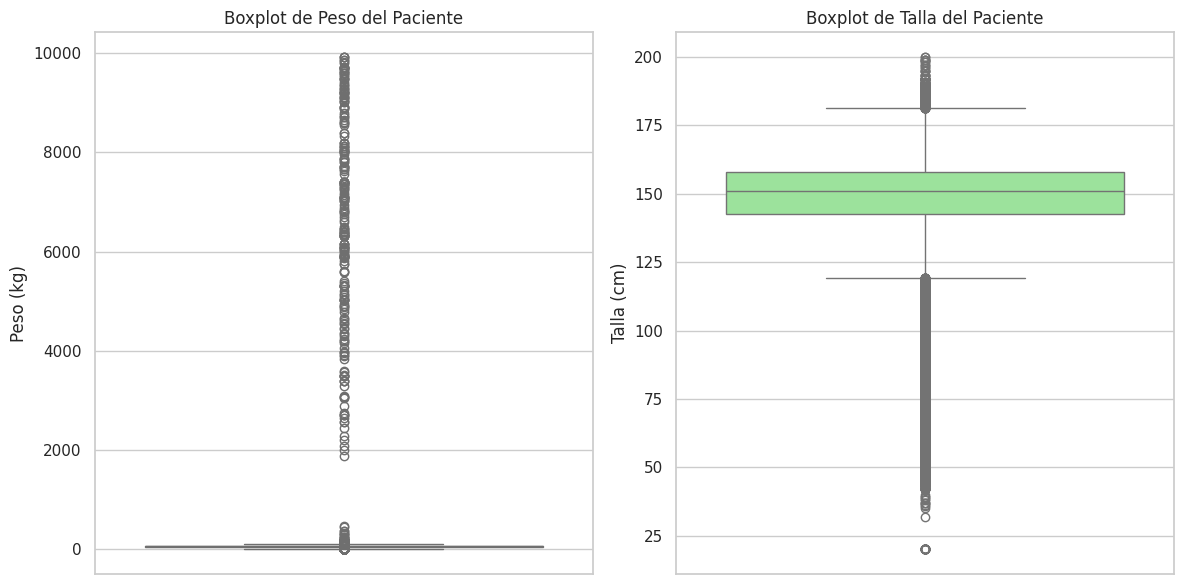

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Eliminamos registros duplicados en todo el DataFrame
df_preprocesado = df_consolidado.drop_duplicates().reset_index(drop=True)

# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# Crear figura con dos subgráficos
plt.figure(figsize=(12, 6))

# Boxplot de Peso
plt.subplot(1, 2, 1)
sns.boxplot(data=df_preprocesado, y='PCTE_PESO', color='skyblue')
plt.title('Boxplot de Peso del Paciente')
plt.ylabel('Peso (kg)')

# Boxplot de Talla
plt.subplot(1, 2, 2)
sns.boxplot(data=df_preprocesado, y='PCTE_TALLA', color='lightgreen')
plt.title('Boxplot de Talla del Paciente')
plt.ylabel('Talla (cm)')

# Mostrar los gráficos
plt.tight_layout()
plt.show()

In [6]:
# Crear función de mapeo por letra inicial del código CIE-10
def clasificar_diagnostico(codigo):
    if not isinstance(codigo, str) or len(codigo) < 1:
        return "Desconocido"
    letra = codigo[0].upper()
    if letra in ['A', 'B']:
        return "Infecciosas"
    elif letra in ['C', 'D']:
        return "Neoplasias / Sangre"
    elif letra == 'E':
        return "Endocrinas / Metabólicas"
    elif letra == 'F':
        return "Mentales"
    elif letra == 'G':
        return "Sistema nervioso"
    elif letra == 'H':
        return "Ojo / Oído"
    elif letra == 'I':
        return "Cardiovasculares"
    elif letra == 'J':
        return "Respiratorias"
    elif letra == 'K':
        return "Digestivas"
    elif letra == 'L':
        return "Piel / Subcutáneo"
    elif letra == 'M':
        return "Osteomuscular"
    elif letra == 'N':
        return "Genitourinario"
    elif letra == 'O':
        return "Obstétricas"
    elif letra == 'P':
        return "Perinatales"
    elif letra == 'Q':
        return "Congénitas"
    elif letra == 'R':
        return "Signos / Síntomas"
    elif letra in ['S', 'T']:
        return "Traumatismos"
    elif letra == 'Z':
        return "Factores sociales"
    else:
        return "Otra"

In [7]:
# Crear función de mapeo por letra inicial del código CIE-10
def clasificar_diagnostico(codigo):
    if not isinstance(codigo, str) or len(codigo) < 1:
        return "100"
    letra = codigo[0].upper()
    if letra in ['A', 'B']:
        return "101"
    elif letra in ['C', 'D']:
        return "102"
    elif letra == 'E':
        return "103"
    elif letra == 'F':
        return "104"
    elif letra == 'G':
        return "105"
    elif letra == 'H':
        return "106"
    elif letra == 'I':
        return "107"
    elif letra == 'J':
        return "108"
    elif letra == 'K':
        return "109"
    elif letra == 'L':
        return "110"
    elif letra == 'M':
        return "111"
    elif letra == 'N':
        return "112"
    elif letra == 'O':
        return "113"
    elif letra == 'P':
        return "114"
    elif letra == 'Q':
        return "115"
    elif letra == 'R':
        return "116"
    elif letra in ['S', 'T']:
        return "117"
    elif letra == 'Z':
        return "118"
    else:
        return "119"

In [8]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Eliminamos registros duplicados en todo el DataFrame
#df_preprocesado = df_consolidado.drop_duplicates().reset_index(drop=True)

# Se identifico inconsistencias en campos críticos (por ejemplo en la edad que estan fuera de rango),
# Se  filtro y se elimino las edades negativas o mayores a 120 años.
df_preprocesado = df_preprocesado[(df_preprocesado["PCTE_ANIOS"] >= 0) & (df_preprocesado["PCTE_ANIOS"] <= 120)]

# Aplicar la función a la columna con los códigos
df_preprocesado["CLAS_DIAG"] = df_preprocesado["CIE_10"].apply(clasificar_diagnostico)

# === 3. Validar rangos realistas de peso y talla ===
# Peso: 1kg a 250kg | Talla: 30cm a 220cm
df_preprocesado = df_preprocesado[
    (df_preprocesado['PCTE_PESO'].between(1, 250)) &
    (df_preprocesado['PCTE_TALLA'].between(30, 220))
]

print(f"Registros después de validar peso y talla: {df_preprocesado.shape[0]}")


# Convertir la columna PCTE_SEXO a valores numéricos: HOMBRE -> 1, MUJER -> 0
df_preprocesado['PCTE_SEXO'] = df_preprocesado['PCTE_SEXO'].map({'Hombre': 1, 'Mujer': 0})

# Verificar si hay valores no mapeados (quedarán como NaN si hay otros valores diferentes)
print(df_preprocesado['PCTE_SEXO'].unique())

df_preprocesado['CLAS_DIAG'] = pd.to_numeric(df_preprocesado['CLAS_DIAG'], errors='coerce')


# === 4. Imputar valores faltantes (si los hay) con la media ===
imputador = SimpleImputer(strategy='mean')
df_preprocesado[['PCTE_PESO', 'PCTE_TALLA']] = imputador.fit_transform(df_preprocesado[['PCTE_PESO', 'PCTE_TALLA']])

# === 5. Escalar variables numéricas (opcional, útil para clustering o ML) ===
escalador = StandardScaler()
df_preprocesado[['PCTE_PESO_ESC', 'PCTE_TALLA_ESC']] = escalador.fit_transform(df_preprocesado[['PCTE_PESO', 'PCTE_TALLA']])

# Verificar resultado
print(df_preprocesado[['PCTE_PESO', 'PCTE_TALLA', 'PCTE_PESO_ESC', 'PCTE_TALLA_ESC']].describe())

<ipython-input-8-8e3f5d7892c0>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_preprocesado["CLAS_DIAG"] = df_preprocesado["CIE_10"].apply(clasificar_diagnostico)
<ipython-input-8-8e3f5d7892c0>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_preprocesado['PCTE_SEXO'] = df_preprocesado['PCTE_SEXO'].map({'Hombre': 1, 'Mujer': 0})


Registros después de validar peso y talla: 384893
[ 0.  1. nan]
           PCTE_PESO     PCTE_TALLA  PCTE_PESO_ESC  PCTE_TALLA_ESC
count  384893.000000  384893.000000   3.848930e+05    3.848930e+05
mean       56.079451     143.041908  -1.023448e-15   -7.936661e-16
std        24.008219      26.151227   1.000001e+00    1.000001e+00
min         1.000000      32.000000  -2.294194e+00   -4.246151e+00
25%        46.000000     142.000000  -4.198339e-01   -3.984169e-02
50%        60.000000     151.000000   1.633005e-01    3.043109e-01
75%        71.250000     158.000000   6.318906e-01    5.719851e-01
max       231.000000     200.000000   7.285871e+00    2.178030e+00


<ipython-input-8-8e3f5d7892c0>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_preprocesado['CLAS_DIAG'] = pd.to_numeric(df_preprocesado['CLAS_DIAG'], errors='coerce')


* Se eliminan los registros duplicados.
* Se filtro los registros con datos fuera de un rango como la edad ennegativo o superior de 120 años.

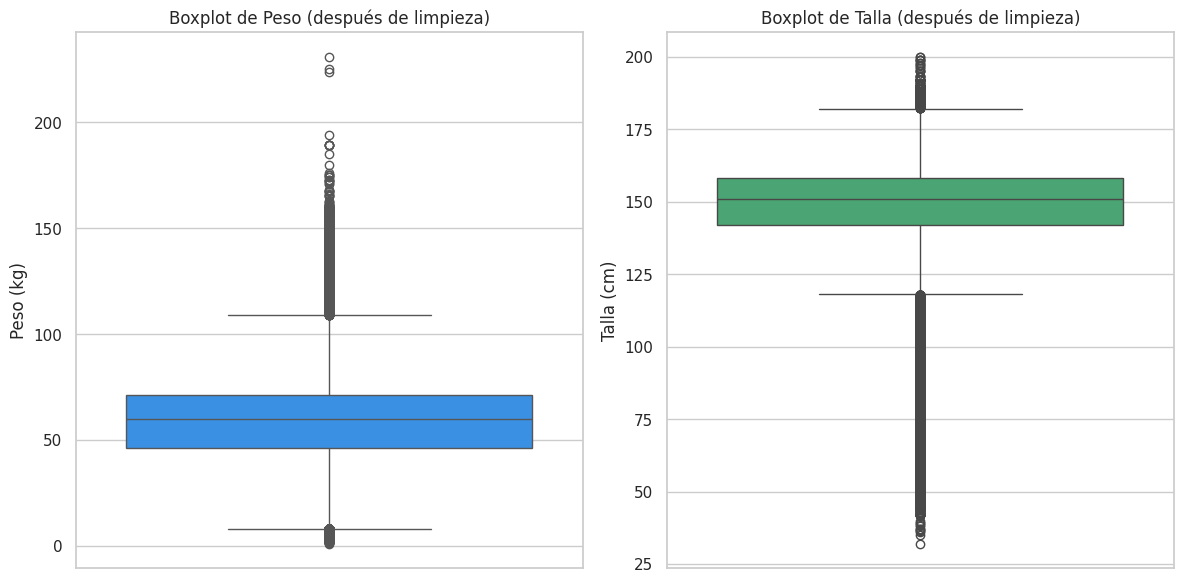

In [9]:
# Gráfico de caja luego del filtrado y la imputación
plt.figure(figsize=(12, 6))

# Boxplot Peso limpio
plt.subplot(1, 2, 1)
sns.boxplot(data=df_preprocesado, y='PCTE_PESO', color='dodgerblue')
plt.title('Boxplot de Peso (después de limpieza)')
plt.ylabel('Peso (kg)')

# Boxplot Talla limpia
plt.subplot(1, 2, 2)
sns.boxplot(data=df_preprocesado, y='PCTE_TALLA', color='mediumseagreen')
plt.title('Boxplot de Talla (después de limpieza)')
plt.ylabel('Talla (cm)')

plt.tight_layout()
plt.show()

In [10]:
from sklearn.impute import SimpleImputer
import pandas as pd

# Mostrar valores nulos antes de imputación
print("Valores nulos antes de imputación:")
print(df_preprocesado.isnull().sum())

Valores nulos antes de imputación:
ENT_NOM                        0
ENT_SIM_TIP_EST                0
ENT_DES_TIP_EST                0
ENT_DES_PROV                   0
ENT_DES_CANT                   0
ENT_DES_PARR                   0
ENT_DES_TIP_PARR               0
PCTE_SEXO                      5
PCTE_FEC_NAC                   0
PCTE_ANIOS                     0
PCTE_NACIONALIDAD          11121
PCTE_AUTID_ETN             37926
PCTE_SEG                       0
PCTE_GRP_PRI               60514
PCTE_DES_PROV              25896
PCTE_DES_CANT              25896
PCTE_DES_PARR              25896
PCTE_DIR_BARR              35463
PCTE_PESO                      0
PCTE_TALLA                     0
PCTE_CAT_TALLA_EDAD_Z     303967
PCTE_CAT_PESO_EDAD_Z      320527
PCTE_CAT_IMC_EDAD_Z       294796
ATEMED_FEC_INI                 0
CIE_10                         0
ATEMED_DES_CIE10               0
ATEMED_TIP_DIAG                0
ATEMED_CRON_DIAG               2
ATEMED_CON_DIAG                2
PCTE_TIP

In [11]:
# Recalcular columnas categóricas y numéricas REALES que aún existen
columnas_numericas = df_preprocesado.select_dtypes(include=[np.number]).columns.tolist()
columnas_categoricas = df_preprocesado.select_dtypes(include=['object', 'category']).columns.tolist()

In [12]:
# Filtrar solo columnas con al menos un valor no nulo para evitar errores en imputación
columnas_numericas_validas = [col for col in columnas_numericas if df_preprocesado[col].notnull().any()]
columnas_categoricas_validas = [col for col in columnas_categoricas if df_preprocesado[col].notnull().any()]

In [13]:
# Imputar variables numéricas con mediana
if columnas_numericas_validas:
    imputer_num = SimpleImputer(strategy="median")
    df_preprocesado[columnas_numericas_validas] = pd.DataFrame(
        imputer_num.fit_transform(df_preprocesado[columnas_numericas_validas]),
        columns=columnas_numericas_validas,
        index=df_preprocesado.index
    )

# Imputar variables categóricas con la moda
if columnas_categoricas_validas:
    imputer_cat = SimpleImputer(strategy="most_frequent")
    df_preprocesado[columnas_categoricas_validas] = pd.DataFrame(
        imputer_cat.fit_transform(df_preprocesado[columnas_categoricas_validas]),
        columns=columnas_categoricas_validas,
        index=df_preprocesado.index
    )

In [14]:
# Verificación post imputación
print("\n¿Quedan valores nulos después de imputación?")
print(df_preprocesado.isnull().sum().sum())


¿Quedan valores nulos después de imputación?
0


In [15]:
print(df_preprocesado.isnull().sum()[df_preprocesado.isnull().sum() > 0])

Series([], dtype: int64)


In [16]:
# Opcional: Descripción básica para observar cambios
print("\ Estadísticas de variables numéricas después de imputación:")
print(df_preprocesado[columnas_numericas].describe().T[['mean', '50%']])

# Guardar versión preprocesada limpia (opcional pero útil para respaldo)
df_preprocesado.to_csv('/content/Consolidado_Limpio.csv', index=False)
print("\n Dataset limpio guardado como 'Consolidado_Limpio.csv'")

\ Estadísticas de variables numéricas después de imputación:
                        mean          50%
PCTE_SEXO       3.176519e-01     0.000000
PCTE_ANIOS      3.891704e+01    40.000000
PCTE_PESO       5.607945e+01    60.000000
PCTE_TALLA      1.430419e+02   151.000000
ANIO            2.022498e+03  2022.000000
CLAS_DIAG       1.078388e+02   108.000000
PCTE_PESO_ESC  -1.023448e-15     0.163301
PCTE_TALLA_ESC -7.936661e-16     0.304311

 Dataset limpio guardado como 'Consolidado_Limpio.csv'


* Se separan las variables numéricas y categóricas.
* Para las variables numéricas se utiliza la mediana.
* Para las variables categóricas se utiliza el valor más frecuente (moda).

In [17]:
# Detección y tratamiento de valores atípicos
# Con la variable de edad "PCTE_ANIOS". Se puede repetir el proceso para otras variables numéricas.
Q1 = df_preprocesado["PCTE_ANIOS"].quantile(0.25)
Q3 = df_preprocesado["PCTE_ANIOS"].quantile(0.75)
IQR = Q3 - Q1

# Definición de límites inferiores y superiores
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Cap (limitar) los valores atípicos en "PCTE_ANIOS"
df_preprocesado["PCTE_ANIOS"] = df_preprocesado["PCTE_ANIOS"].apply(lambda x: np.clip(x, limite_inferior, limite_superior))

* Se identifica el rango intercuartílico (IQR) para la variable de edad y se limita (cap) los valores atípicos utilizando el método IQR.

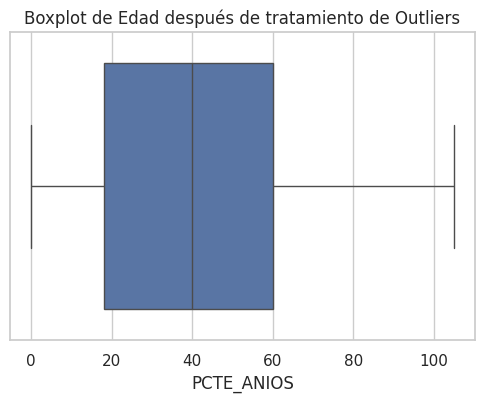

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Graficar boxplot de "PCTE_ANIOS" después de limitar los outliers
plt.figure(figsize=(6,4))
sns.boxplot(data=df_preprocesado, x="PCTE_ANIOS")
plt.title("Boxplot de Edad después de tratamiento de Outliers")
plt.show()

In [19]:
# Normalización y estandarización de variables numéricas
# Se utiliza StandardScaler para transformar las variables numéricas a una escala estándar
scaler = StandardScaler()
df_preprocesado[columnas_numericas] = scaler.fit_transform(df_preprocesado[columnas_numericas])

* Se aplica StandardScaler para transformar las variables numéricas a una escala estándar, lo que facilita el desempeño de los modelos de Machine Learning.

In [20]:
# Ver estadísticas descriptivas después de la normalización
print("\n Estadísticas después de la normalización:")
print(df_preprocesado[columnas_numericas].describe().T)


 Estadísticas después de la normalización:
                   count          mean       std       min       25%  \
PCTE_SEXO       384893.0  6.771416e-17  1.000001 -0.682296 -0.682296   
PCTE_ANIOS      384893.0  4.430589e-17  1.000001 -1.572020 -0.844926   
PCTE_PESO       384893.0 -1.023448e-15  1.000001 -2.294194 -0.419834   
PCTE_TALLA      384893.0 -7.936661e-16  1.000001 -4.246151 -0.039842   
ANIO            384893.0 -1.942441e-13  1.000001 -0.995389 -0.995389   
CLAS_DIAG       384893.0 -8.062195e-16  1.000001 -1.596716 -1.129760   
PCTE_PESO_ESC   384893.0  1.089186e-17  1.000001 -2.294194 -0.419834   
PCTE_TALLA_ESC  384893.0  2.303906e-17  1.000001 -4.246151 -0.039842   

                     50%       75%       max  
PCTE_SEXO      -0.682296  1.465640  1.465640  
PCTE_ANIOS      0.043745  0.851628  2.669364  
PCTE_PESO       0.163301  0.631891  7.285871  
PCTE_TALLA      0.304311  0.571985  2.178030  
ANIO           -0.995389  1.004633  1.004633  
CLAS_DIAG       0.037631 

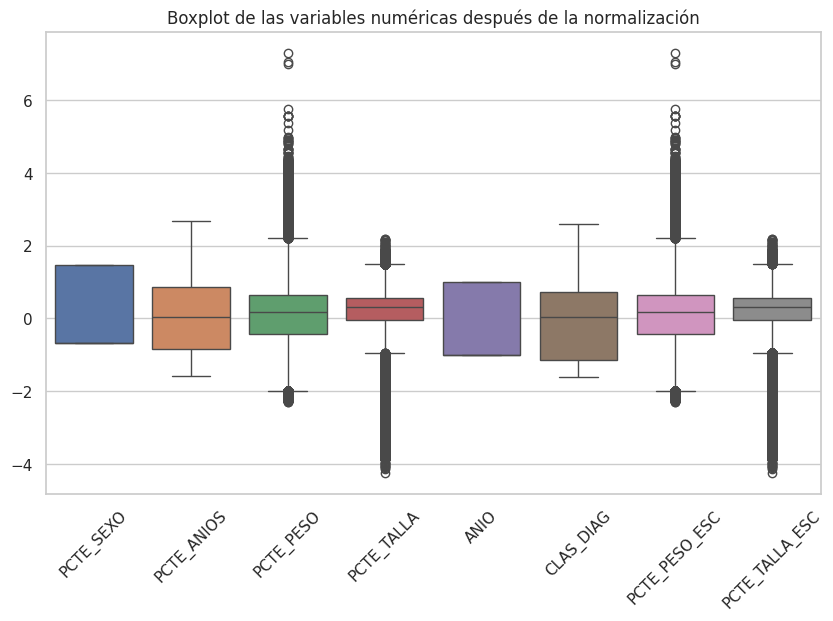

In [21]:
# Graficar boxplot de las variables numéricas después de la normalización
plt.figure(figsize=(10,6))
sns.boxplot(data=df_preprocesado[columnas_numericas])
plt.title("Boxplot de las variables numéricas después de la normalización")
plt.xticks(rotation=45)
plt.show()

In [22]:
# Verificar resultados finales del preprocesamiento
print("Vista previa del DataFrame preprocesado:")
print(df_preprocesado.head())

Vista previa del DataFrame preprocesado:
       ENT_NOM ENT_SIM_TIP_EST  \
0     ALTAMIRA            CS-B   
1        MANTA            CS-C   
2  LOS ESTEROS            CS-A   
3  15 DE ABRIL            CS-A   
4     ALTAMIRA            CS-B   

                                     ENT_DES_TIP_EST ENT_DES_PROV  \
0                             CENTRO DE SALUD TIPO B       MANABI   
1  CENTRO DE SALUD TIPO C-MATERNO INFANTIL Y EMER...       MANABI   
2                             CENTRO DE SALUD TIPO A       MANABI   
3                             CENTRO DE SALUD TIPO A       MANABI   
4                             CENTRO DE SALUD TIPO B       MANABI   

  ENT_DES_CANT    ENT_DES_PARR ENT_DES_TIP_PARR  PCTE_SEXO  \
0        MANTA     LOS ESTEROS           Urbano  -0.682296   
1        MANTA  MANTA (URBANO)           Urbano   1.465640   
2        MANTA     LOS ESTEROS           Urbano  -0.682296   
3        MANTA     ELOY ALFARO           Urbano  -0.682296   
4        MANTA     LOS ESTERO

Este proceso asegura la calidad de los datos para proceder con las fases posteriores del análisis y modelado.

In [23]:
# Revisar columnas que no aportan información
# Eliminar columnas con demasiados valores nulos (por ejemplo, más del 80%)
threshold = 0.8  # Puedes ajustar el umbral según lo que consideres aceptable
columnas_a_eliminar = df_preprocesado.columns[df_preprocesado.isnull().mean() > threshold]

# También eliminar las columnas "Unnamed"
columnas_a_eliminar = columnas_a_eliminar.union([col for col in df_preprocesado.columns if "Unnamed" in col])

# Eliminar las columnas
df_preprocesado = df_preprocesado.drop(columns=columnas_a_eliminar)

print("Columnas después de eliminar las innecesarias:")
print(df_preprocesado.columns)

Columnas después de eliminar las innecesarias:
Index(['ENT_NOM', 'ENT_SIM_TIP_EST', 'ENT_DES_TIP_EST', 'ENT_DES_PROV',
       'ENT_DES_CANT', 'ENT_DES_PARR', 'ENT_DES_TIP_PARR', 'PCTE_SEXO',
       'PCTE_FEC_NAC', 'PCTE_ANIOS', 'PCTE_NACIONALIDAD', 'PCTE_AUTID_ETN',
       'PCTE_SEG', 'PCTE_GRP_PRI', 'PCTE_DES_PROV', 'PCTE_DES_CANT',
       'PCTE_DES_PARR', 'PCTE_DIR_BARR', 'PCTE_PESO', 'PCTE_TALLA',
       'PCTE_CAT_TALLA_EDAD_Z', 'PCTE_CAT_PESO_EDAD_Z', 'PCTE_CAT_IMC_EDAD_Z',
       'ATEMED_FEC_INI', 'CIE_10', 'ATEMED_DES_CIE10', 'ATEMED_TIP_DIAG',
       'ATEMED_CRON_DIAG', 'ATEMED_CON_DIAG', 'PCTE_TIP_DISC',
       'ATEMED_TIP_ATE', 'ATEMED_LUG_ATE', 'PCTE_ULT_IMC_CATEGORIA', 'ANIO',
       'CLAS_DIAG', 'PCTE_PESO_ESC', 'PCTE_TALLA_ESC'],
      dtype='object')


Este bloque detecta y elimina columnas cuyo nombre contenga "Unnamed", que suelen ser generadas por errores en el formato del Excel.

In [24]:
# Convertir columnas de fechas a tipo datetime
df_preprocesado["PCTE_FEC_NAC"] = pd.to_datetime(df_preprocesado["PCTE_FEC_NAC"], errors="coerce")
df_preprocesado["ATEMED_FEC_INI"] = pd.to_datetime(df_preprocesado["ATEMED_FEC_INI"], errors="coerce")

# Verificar si hay valores nulos en las columnas de fecha
print(df_preprocesado[["PCTE_FEC_NAC", "ATEMED_FEC_INI"]].isnull().sum())

print("\nTipos de datos actualizados:")
print(df_preprocesado.dtypes)

PCTE_FEC_NAC      0
ATEMED_FEC_INI    0
dtype: int64

Tipos de datos actualizados:
ENT_NOM                           object
ENT_SIM_TIP_EST                   object
ENT_DES_TIP_EST                   object
ENT_DES_PROV                      object
ENT_DES_CANT                      object
ENT_DES_PARR                      object
ENT_DES_TIP_PARR                  object
PCTE_SEXO                        float64
PCTE_FEC_NAC              datetime64[ns]
PCTE_ANIOS                       float64
PCTE_NACIONALIDAD                 object
PCTE_AUTID_ETN                    object
PCTE_SEG                          object
PCTE_GRP_PRI                      object
PCTE_DES_PROV                     object
PCTE_DES_CANT                     object
PCTE_DES_PARR                     object
PCTE_DIR_BARR                     object
PCTE_PESO                        float64
PCTE_TALLA                       float64
PCTE_CAT_TALLA_EDAD_Z             object
PCTE_CAT_PESO_EDAD_Z              object
PCTE_CAT_IMC_ED

El uso de pd.to_datetime permite que las fechas sean reconocidas correctamente y facilita su uso en análisis de series de tiempo o cálculo de intervalos.

# Fase 3: Transformación de Datos

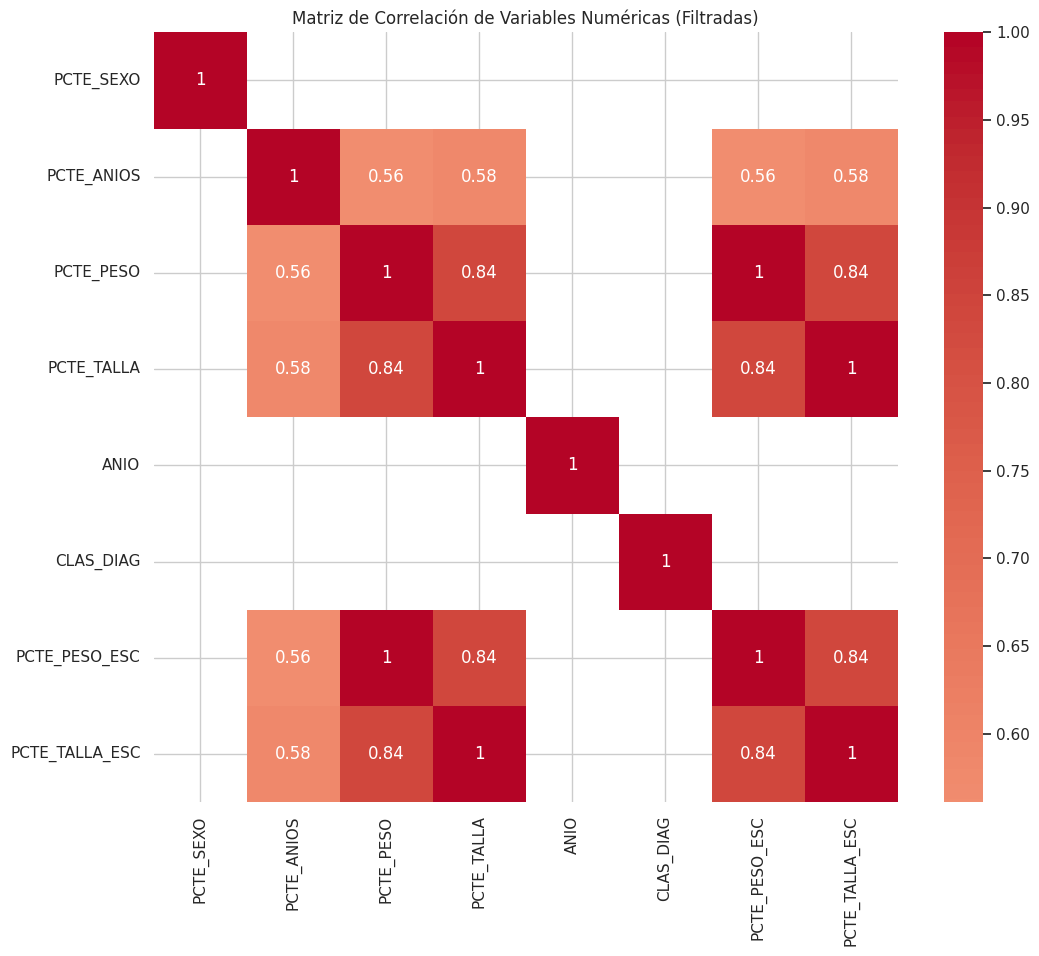

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionamos solo las columnas numéricas del DataFrame preprocesado
df_numeric = df_preprocesado.select_dtypes(include=[np.number])

# Calcular la matriz de correlación
correlation_matrix = df_numeric.corr()

# Filtrar las correlaciones que son menores a 0.2 o mayores a -0.2
correlation_matrix_filtered = correlation_matrix[correlation_matrix.abs() > 0.2]

# Visualizar la matriz de correlación filtrada
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix_filtered, annot=True, cmap="coolwarm", center=0)
plt.title("Matriz de Correlación de Variables Numéricas (Filtradas)")
plt.show()

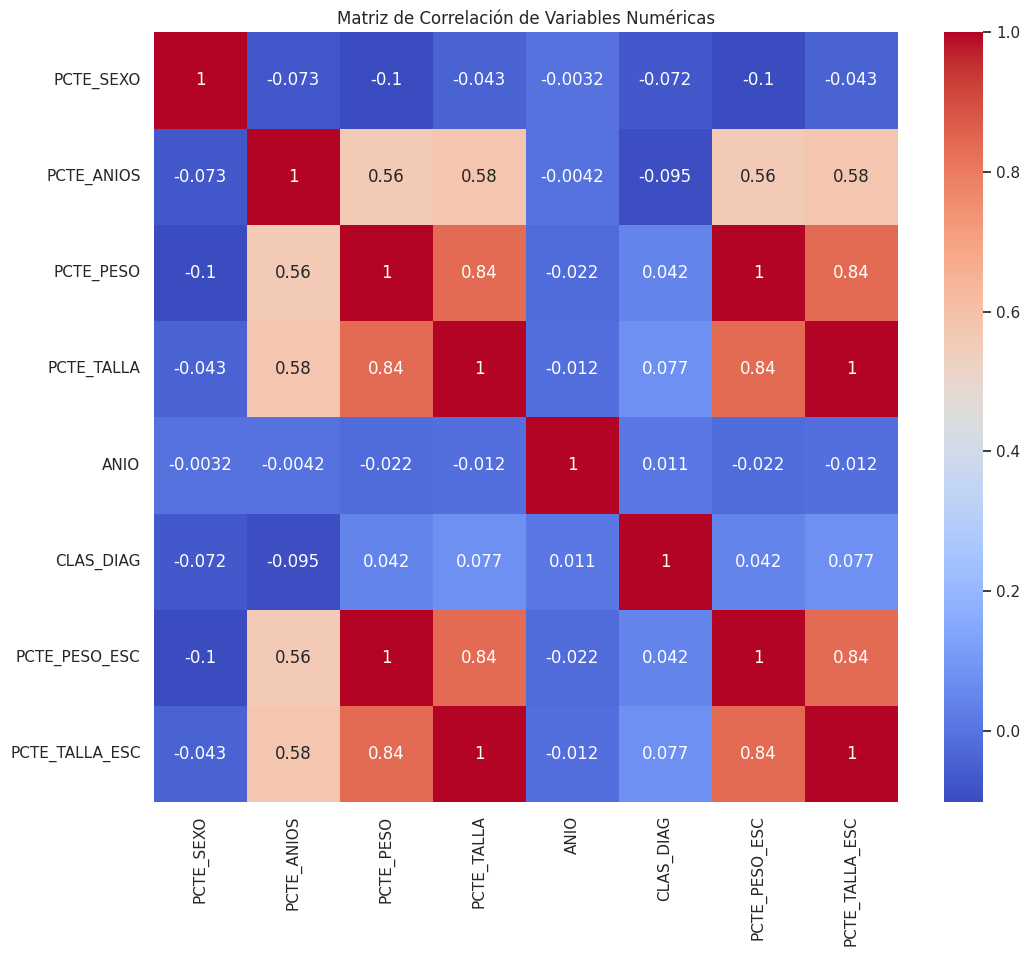

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionamos solo las columnas numéricas del DataFrame preprocesado
df_numeric = df_preprocesado.select_dtypes(include=[np.number])

# Calcular y visualizar la matriz de correlación
correlation_matrix = df_numeric.corr()

plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Matriz de Correlación de Variables Numéricas")
plt.show()

* Se extraen las variables numéricas del DataFrame.
* Se calcula la correlación entre ellas y se visualiza mediante un heatmap, lo que permite identificar pares de variables altamente correlacionadas.

En este gráfico se observa la matriz de correlación entre tres variables numéricas: PCTE_ANIOS, PCTE_PESO y PCTE_TALLA.

1. PCTE_ANIOS y PCTE_TALLA muestran una correlación moderada (~0.54), lo cual sugiere que, a medida que aumenta la edad, existe cierta tendencia a que la talla también varíe en la misma dirección (o viceversa).

2. PCTE_ANIOS con PCTE_PESO (0.034) y PCTE_PESO con PCTE_TALLA (0.041) presentan valores de correlación muy bajos, indicando que no hay una relación lineal fuerte entre estas variables.

En general, ninguna de las correlaciones es tan alta como para indicar redundancia entre variables, por lo que no sería necesario eliminar alguna de ellas por alta correlación. El valor más destacable es el de PCTE_ANIOS con PCTE_TALLA, pero sigue estando en un rango moderado.

In [27]:
def eliminar_correlacion_alta(df, umbral=0.85):
    """
    Esta función elimina columnas que presenten una correlación mayor al umbral definido.
    Retorna el DataFrame reducido y la lista de columnas eliminadas.
    """
    # Calcular la matriz de correlación absoluta
    corr_matrix = df.corr().abs()
    # Seleccionar la parte superior de la matriz de correlación
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    # Identificar columnas con alta correlación
    to_drop = [column for column in upper.columns if any(upper[column] > umbral)]
    # Retornar el DataFrame sin las columnas redundantes y la lista de columnas eliminadas
    return df.drop(columns=to_drop), to_drop

# Aplicar la función para eliminar variables redundantes
df_reducido, features_eliminadas = eliminar_correlacion_alta(df_numeric, umbral=0.85)
print("Características eliminadas por alta correlación:", features_eliminadas)

Características eliminadas por alta correlación: ['PCTE_PESO_ESC', 'PCTE_TALLA_ESC']


## PCA Análisis Principal de Componentes

In [28]:
from sklearn.decomposition import PCA

# Se aplica PCA para conservar el 95% de la varianza
pca = PCA(n_components=0.95)
pca_transformed = pca.fit_transform(df_reducido)

print("Número de componentes seleccionados para conservar el 95% de la varianza:", pca.n_components_)

# Crear un DataFrame con los componentes principales
df_pca = pd.DataFrame(data=pca_transformed,
                      columns=[f"PC{i+1}" for i in range(pca.n_components_)])
print("Vista previa del DataFrame con componentes principales:")
print(df_pca.head())

Número de componentes seleccionados para conservar el 95% de la varianza: 5
Vista previa del DataFrame con componentes principales:
        PC1       PC2       PC3       PC4       PC5
0  0.862821 -0.710576 -0.915520 -1.180702 -0.027311
1 -3.263447 -1.665930 -0.838956  0.305025 -0.087986
2  0.746557 -0.060160 -0.981264 -0.761098  0.725716
3  1.313186  0.895613 -1.091534  0.030210  0.495157
4  0.356813  0.402878 -1.046709 -0.406717  0.419282


La salida muestra cómo los datos originales fueron transformados a un nuevo espacio de 3 dimensiones (PC1, PC2, PC3) que retiene la mayor parte de la variabilidad de los datos, cumpliendo así el objetivo de la reducción de dimensionalidad.

* Se inicializa el PCA para que seleccione el número mínimo de componentes necesarios para explicar el 95% de la varianza del conjunto de datos.
* Se transforma el DataFrame reducido a un nuevo espacio de componentes principales.
* Se crea un nuevo DataFrame df_pca que contiene estas nuevas variables, facilitando el análisis posterior.

# Fase 4: Minería de Datos

**Análisis Exploratorio para Encontrar Tendencias**

In [29]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

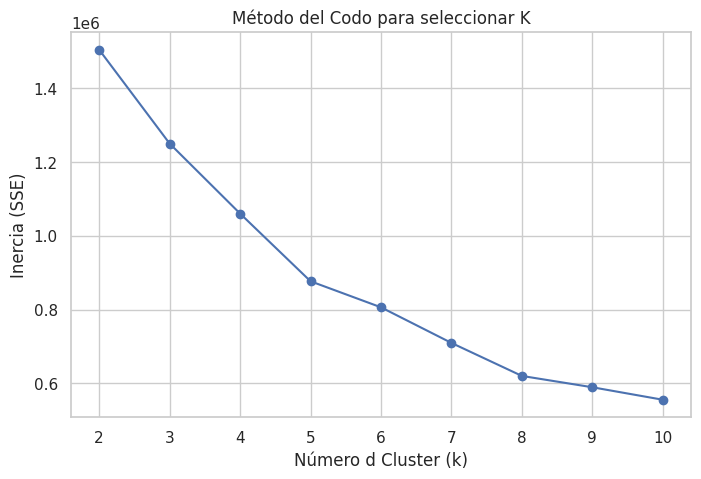

In [30]:
#Supongamos que pca_result es un arreglo de shape (n_samples, 2) o (n_samples, n_components)
inertial_values = []

#Valores de K (número de clusters)
k_values = range(2,11) #Se evaluaran k números de clusters entre 2 y 10

for k in k_values:
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(df_pca)
  inertial_values.append(kmeans.inertia_)

#Gráfica de la inercia versus número de clusters
plt.figure(figsize=(8,5))
plt.plot(k_values, inertial_values, 'bo-')
plt.xlabel("Número d Cluster (k)")
plt.ylabel("Inercia (SSE)")
plt.title("Método del Codo para seleccionar K")
plt.show()

Método 2 de la Silueta

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.datasets import make_blobs
import matplotlib.cm as cm

In [32]:
range_n_clusters = 2 #define el número de clusters que se quiere probar

#Se define el modelo K-Means con N clusters
#random_state asegura que los resultados sean reproducibles
#n_init=10, ejecuta el algoritmo 10 veces con diferentes inicializaciones y elige la mejor solución
kmeans = KMeans(n_clusters=range_n_clusters, random_state=42, n_init=10)
#Ajusta el modelo a los datos (df_pca)
#Predice a qué cluster pertenece cada punto
labels = kmeans.fit_predict(df_pca) #almacenará el número de cluster asignado a cada punto.

#Calcular el coeficiente de Silhouette
silhouette_avg = silhouette_score(df_pca, labels)
print(f"Coeficiente de Silhouette: {silhouette_avg:.4f}")
#Valores cercanos a 1 → Buena separación entre clusters.
#Valores cercanos a 0 → Los puntos están en el límite de varios clusters.
#Valores negativos → Algunos puntos podrían estar mal clasificados.

Coeficiente de Silhouette: 0.3917


> Podemos interpretar que el valor de 0.4528 indica que los clusters tienen una separación moderada. Además sugiere que los clusters están relativamente bien definidos, pero no necesariamente pueden estar de manera óptima.

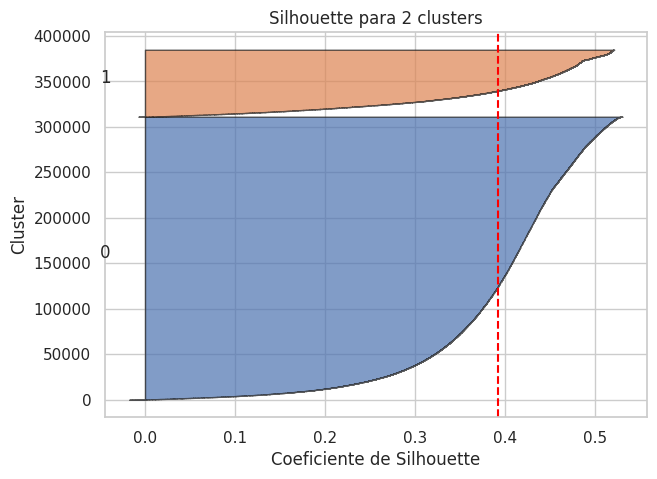

In [33]:
# X: Las características del conjunto de datos
# labels: Las etiquetas de los clusters asignadas a cada punto de X
# n_clusters: El número de clusters (o el rango de clusters) a evaluar
def plot_silhouette(X, labels, n_clusters):
    silhouette_vals = silhouette_samples(X, labels) # se calcula el coeficiente de Silhouette para cada punto en X
    y_lower, y_upper = 0, 0
    fig, ax = plt.subplots(figsize=(7, 5)) #Esto establece una figura y un eje (ax) para la visualización del gráfico

    for i in range(n_clusters):
        cluster_silhouette_vals = silhouette_vals[labels == i] #Se filtran los valores de Silhouette que pertenecen a ese cluster (labels == i)
        cluster_silhouette_vals.sort() #Luego, esos valores se ordenan de menor a mayor con sort()
        y_upper += len(cluster_silhouette_vals)
        ax.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_vals,
                         alpha=0.7, edgecolor='k')
        ax.text(-0.05, y_lower + 0.5 * len(cluster_silhouette_vals), str(i))
        y_lower = y_upper

    ax.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax.set_xlabel("Coeficiente de Silhouette")
    ax.set_ylabel("Cluster")
    ax.set_title(f"Silhouette para {n_clusters} clusters")
    plt.show()

plot_silhouette(df_pca, labels, n_clusters=range_n_clusters)

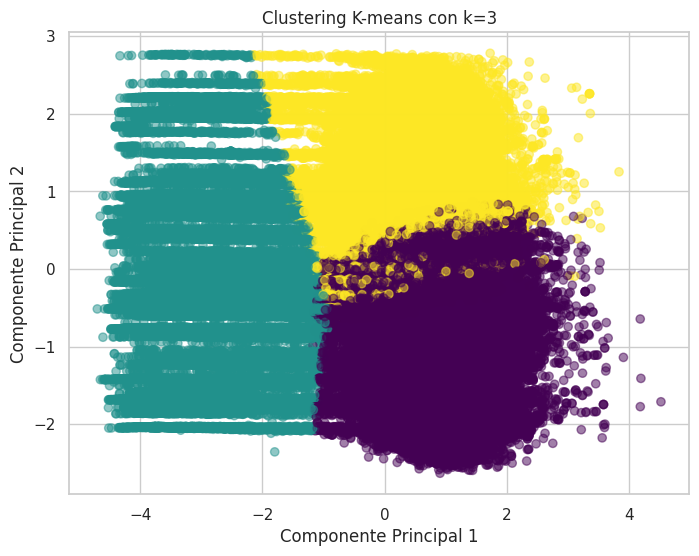

In [34]:
#Entrenar a k-means con k óptimo (por ejemplo k=3)

k_optimo = 3

kmeans_op = KMeans(n_clusters=k_optimo, random_state=42)
cluster_opt = kmeans_op.fit_predict(df_pca)

# Crear un DataFrame para graficar asumiendo 2 componentes
import pandas as pd

ndf_cluster = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])
ndf_cluster['Clusters'] = cluster_opt

#Visualización de los Clusters
plt.figure(figsize=(8,6))
plt.scatter(ndf_cluster['PC1'], ndf_cluster['PC2'], c=ndf_cluster['Clusters'], cmap='viridis', alpha=0.5)
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title(f"Clustering K-means con k={k_optimo}")
plt.show()

count                           298950
mean     2022-11-08 12:24:04.190666752
min                2022-01-01 00:00:00
25%                2022-06-02 00:00:00
50%                2022-11-11 00:00:00
75%                2023-04-13 00:00:00
max                2023-10-31 00:00:00
Name: ATEMED_FEC_INI, dtype: object


<ipython-input-35-c87cb73f11dc>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_preprocesado["Mes"] = df_preprocesado["ATEMED_FEC_INI"].dt.to_period("M")


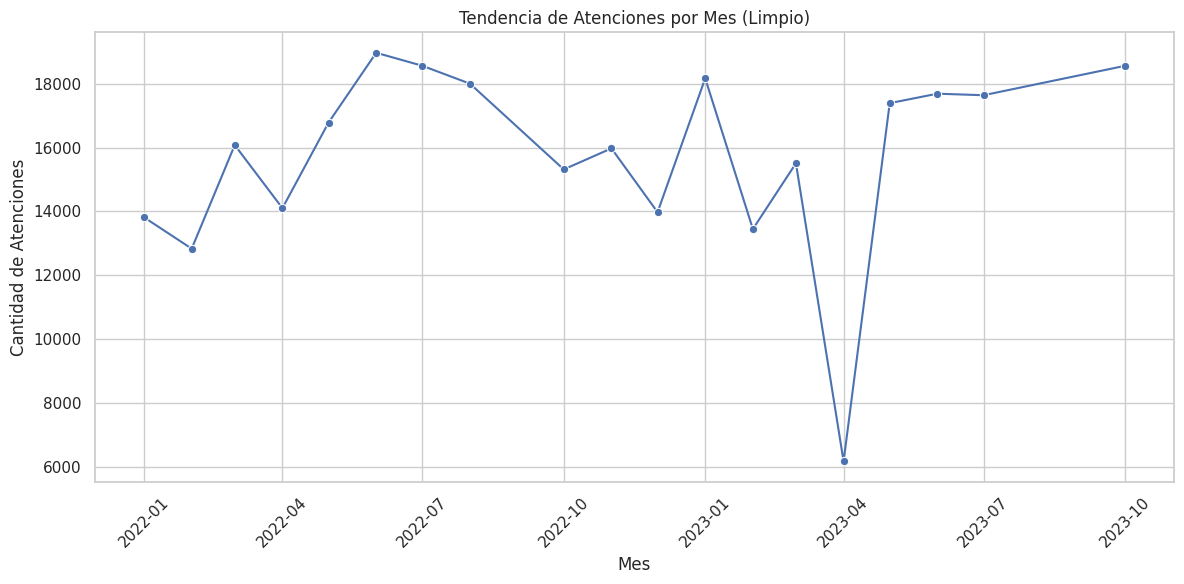

In [35]:

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Asegurarse de que la columna de fecha esté en formato datetime
df_preprocesado["ATEMED_FEC_INI"] = pd.to_datetime(df_preprocesado["ATEMED_FEC_INI"], errors="coerce")

# Eliminar registros con fechas fuera del rango 2022-2023
df_preprocesado = df_preprocesado[(df_preprocesado["ATEMED_FEC_INI"].dt.year >= 2022) &
                                  (df_preprocesado["ATEMED_FEC_INI"].dt.year <= 2023)]

# Verificar que no haya fechas fuera del rango
print(df_preprocesado["ATEMED_FEC_INI"].describe())

# Agrupar los datos por mes y contar la cantidad de atenciones
df_preprocesado["Mes"] = df_preprocesado["ATEMED_FEC_INI"].dt.to_period("M")
tendencias = df_preprocesado.groupby("Mes").size().reset_index(name="Cantidad_Atenciones")

# Convertir el período a datetime para graficar
tendencias["Mes"] = tendencias["Mes"].dt.to_timestamp()

# Graficar la tendencia en el tiempo
plt.figure(figsize=(12,6))
sns.lineplot(x="Mes", y="Cantidad_Atenciones", data=tendencias, marker="o")
plt.title("Tendencia de Atenciones por Mes (Limpio)")
plt.xlabel("Mes")
plt.ylabel("Cantidad de Atenciones")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

* Se asegura que la columna de fechas esté en formato datetime.
* Se agrupa la información por mes (utilizando la columna ATEMED_FEC_INI) y se cuenta el número de registros.
* Se grafica la cantidad de atenciones a lo largo del tiempo para detectar tendencias.

**Implementación de Modelos Predictivos**

In [36]:
# Crear la variable objetivo: 1 si el diagnóstico indica enfermedad respiratoria, 0 en caso contrario
df_model = df_preprocesado.copy()
#df_model["enfermedad_respiratoria"] = df_model["CLAS_DIAG"].apply(lambda x: 1 if 108 in str(x).upper() else 0)
#df_model["enfermedad_respiratoria"] = df_model["CLAS_DIAG"].apply(lambda x: 1 if x == 108 else 0)
# Ejemplo: considerar "enfermedad respiratoria" si el valor está dentro de cierto rango
df_model["enfermedad_respiratoria"] = df_model["CLAS_DIAG"].apply(
    lambda x: 1 if x >= 1.0 and x <= 2.0 else 0
)


# Seleccionar algunas variables numéricas como características predictoras.
# En este ejemplo se usan 'PCTE_ANIOS', 'PCTE_PESO' y 'PCTE_TALLA'.
features = ["PCTE_ANIOS", "PCTE_PESO", "PCTE_TALLA", "PCTE_SEXO"]
X = df_model[features]
y = df_model["enfermedad_respiratoria"]

# Dividir el conjunto de datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Tamaño de entrenamiento:", X_train.shape)
print("Tamaño de prueba:", X_test.shape)

Tamaño de entrenamiento: (209265, 4)
Tamaño de prueba: (89685, 4)


* Se crea la variable objetivo enfermedad_respiratoria que vale 1 si el diagnóstico contiene “RESPIR” y 0 en caso contrario.
* Se seleccionan variables predictoras y se divide el dataset en entrenamiento (70%) y prueba (30%).

**Regresión Logística**

In [37]:
print(y_train.value_counts())

enfermedad_respiratoria
0    185775
1     23490
Name: count, dtype: int64


In [38]:
from sklearn.linear_model import LogisticRegression

# Inicializar y entrenar el modelo de regresión logística
modelo_lr = LogisticRegression(random_state=42, max_iter=1000)
modelo_lr.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred_lr = modelo_lr.predict(X_test)

* Se inicializa el modelo de regresión logística, se entrena y se realizan predicciones en el conjunto de prueba.

**Árbol de Decisión**

In [39]:
from sklearn.tree import DecisionTreeClassifier

# Inicializar y entrenar el modelo de árbol de decisión
modelo_dt = DecisionTreeClassifier(random_state=42)
modelo_dt.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred_dt = modelo_dt.predict(X_test)

* Se utiliza un clasificador de árbol de decisión para entrenar el modelo y predecir los resultados en el conjunto de prueba.

**Red Neuronal (Perceptrón Multicapa)**

In [40]:
from sklearn.neural_network import MLPClassifier

# Inicializar y entrenar el modelo de red neuronal (MLP)
modelo_nn = MLPClassifier(random_state=42, max_iter=500)
modelo_nn.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred_nn = modelo_nn.predict(X_test)

* Se utiliza un MLPClassifier para representar una red neuronal simple.
* Se entrena y se realizan predicciones sobre el conjunto de prueba.

# Fase 5: Interpretación y Evaluación de Resultados

In [41]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Función para evaluar y mostrar métricas de un modelo
def evaluar_modelo(y_test, y_pred, nombre_modelo):
    print(f"--- Evaluación del {nombre_modelo} ---")
    print("Precisión:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1-Score:", f1_score(y_test, y_pred))
    print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))
    print("\n")

# Evaluar el modelo de Regresión Logística
evaluar_modelo(y_test, y_pred_lr, "Regresión Logística")

# Evaluar el modelo de Árbol de Decisión
evaluar_modelo(y_test, y_pred_dt, "Árbol de Decisión")

# Evaluar el modelo de Red Neuronal
evaluar_modelo(y_test, y_pred_nn, "Red Neuronal")

--- Evaluación del Regresión Logística ---
Precisión: 0.24390243902439024
Recall: 0.0010022048506714773
F1-Score: 0.001996207206308015

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     79707
           1       0.24      0.00      0.00      9978

    accuracy                           0.89     89685
   macro avg       0.57      0.50      0.47     89685
weighted avg       0.82      0.89      0.84     89685



--- Evaluación del Árbol de Decisión ---
Precisión: 0.4015951208069435
Recall: 0.3431549408699138
F1-Score: 0.37008214440121057

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93     79707
           1       0.40      0.34      0.37      9978

    accuracy                           0.87     89685
   macro avg       0.66      0.64      0.65     89685
weighted avg       0.86      0.87      0.87     89685



--- Evaluación del Red 

Los modelos predictivos aplicados evidencian un marcado desbalance en las clases del conjunto de datos, lo que afecta significativamente el desempeño de los algoritmos, especialmente en la detección de casos positivos (enfermedades respiratorias). La regresión logística no logró identificar adecuadamente esta clase, mostrando un recall de 0.00 y un F1-score casi nulo. En contraste, el árbol de decisión presentó un mejor rendimiento con un recall de 0.34 y un F1-score de 0.37, aunque aún insuficiente para un escenario real. Estos resultados resaltan la necesidad de aplicar técnicas de balanceo de datos como SMOTE u otras estrategias, para mejorar la capacidad predictiva de los modelos. Es fundamental ajustar el preprocesamiento y la selección de variables para lograr una mayor representatividad y precisión en el análisis.